In [ ]:
import tensorflow
tensorflow.__version__

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    # RIP Training time
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [1]:
TRAIN_JSON = './../Data/line_data.json'
IMG_FOLDER = './../Data/line_data/'

In [2]:
import json
# open these label jsons files
with open(TRAIN_JSON, 'r', encoding='utf8') as f:
    train_labels = json.load(f)

# with open(TRAIN_kalapa, 'r', encoding='utf8') as f:
#     train_labels = json.load(f)

In [3]:
vietnamese_char_list = [
    'a', 'à', 'á', 'ả', 'ã', 'ạ',
    'ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ',
    'â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ',
    'b', 'c', 'd', 'đ', 'e', 'è',
    'é', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ề',
    'ế', 'ể', 'ễ', 'ệ', 'f', 'g',
    'h', 'i', 'ì', 'í', 'ỉ', 'ĩ',
    'ị', 'j', 'k', 'l', 'm', 'n',
    'o', 'ò', 'ó', 'ỏ', 'õ', 'ọ',
    'ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ',
    'ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ',
    'p', 'q', 'r', 's', 't', 'u',
    'ù', 'ú', 'ủ', 'ũ', 'ụ', 'ư',
    'ừ', 'ứ', 'ử', 'ữ', 'ự', 'v',
    'w', 'x', 'y', 'ỳ', 'ý', 'ỷ',
    'ỹ', 'ỵ', 'z', 'A', 'À', 'Á',
    'Ả', 'Ã', 'Ạ', 'Ă', 'Ằ', 'Ắ',
    'Ẳ', 'Ẵ', 'Ặ', 'Â', 'Ầ', 'Ấ',
    'Ẩ', 'Ẫ', 'Ậ', 'B', 'C', 'D',
    'Đ', 'E', 'È', 'É', 'Ẻ', 'Ẽ',
    'Ẹ', 'Ê', 'Ề', 'Ế', 'Ể', 'Ễ',
    'Ệ', 'F', 'G', 'H', 'I', 'Ì',
    'Í', 'Ỉ', 'Ĩ', 'Ị', 'J', 'K',
    'L', 'M', 'N', 'O', 'Ò', 'Ó',
    'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ồ', 'Ố',
    'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ờ', 'Ớ',
    'Ở', 'Ỡ', 'Ợ', 'P', 'Q', 'R',
    'S', 'T', 'U', 'Ù', 'Ú', 'Ủ',
    'Ũ', 'Ụ', 'Ư', 'Ừ', 'Ứ', 'Ử',
    'Ữ', 'Ự', 'V', 'W', 'X', 'Y',
    'Ỳ', 'Ý', 'Ỷ', 'Ỹ', 'Ỵ', 'Z',
    '0', '1', '2', '3', '4', '5',
    '6', '7', '8', '9', '!', '@',
    '#', '$', '%', '^', '&', '*',
    '(', ')', '_', '+', '-', '=',
    '{', '}', '[', ']', '|', '\\',
    ';', ':', "'", '"', '<', '>',
    ',', '.', '/', '?', ' ', '~',
    '`']
vietnamese_char_list = sorted(vietnamese_char_list)
print("\n### --- There are {} Vietnamese tokens...\n".format(len(vietnamese_char_list))) #229


### --- There are 229 Vietnamese tokens...



In [4]:
def encode_to_labels(txt):
    # encoding each output word into digits of indexes
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(vietnamese_char_list.index(char))
        except:
            print("No found in token list :", char)
    return dig_lst


In [5]:
encode_to_labels("Quốc Âm Tân Tự")

[49, 85, 188, 67, 0, 97, 77, 0, 52, 113, 78, 0, 52, 220]

In [6]:
import os
import pathlib
# find all image paths for train folder 1 and 2 and test folder
train_image_path = []

for item in pathlib.Path(IMG_FOLDER).glob('**/*'):
    if item.is_file() and item.suffix not in [".json"]:
        train_image_path.append(str(item))


dict_filepath_label={}
raw_data_path = pathlib.Path(os.path.join(IMG_FOLDER))
for item in raw_data_path.glob('**/*.*'):
    file_name=str(os.path.basename(item))
    if file_name != "labels.json":
        file_name = file_name.split(".")[0]  #only use for train_line
        label = train_labels[file_name]
        dict_filepath_label[str(item)]=label

In [7]:
# train_image_path[:10]

In [8]:
# dict_filepath_label

In [9]:
# find the maximum label length
label_lens= []
for label in dict_filepath_label.values():
    label_lens.append(len(label))
max_label_len = max(label_lens)

print(max_label_len)

158


In [10]:
all_image_paths = list(dict_filepath_label.keys())

In [11]:
# all_image_paths[:10]

In [12]:
import cv2
# find all widths and heights of images (this is useful if our dataset images got different sizes)
widths = []
heights = []
for image_path in all_image_paths:
    img = cv2.imread(image_path)
    (height, width, _) = img.shape
    heights.append(height)
    widths.append(width)

In [13]:
min_height = min(heights)
max_height = max(heights)
min_width = min(widths)
max_width = max(widths)

# this information is useful for making decision for padding and resizing
(min_height, max_height, min_width, max_width)

(40, 396, 321, 523)

In [14]:
from sklearn.model_selection import train_test_split
test_size = 0.999
train_image_paths, val_image_paths = train_test_split(all_image_paths, test_size=test_size, random_state=42)

/space/hotel/vinhle/miniconda3/envs/Hao/lib/python3.9/site-packages/sklearn/utils/__init__.py:21: UserWarning: A NumPy version >=1.22.4 and <1.29.0 is required for this version of SciPy (detected version 1.22.2)
  from scipy.sparse import issparse


In [15]:
# Constants (we choose this number as we later discover that the output of our CNN is (1,9,512) from out input)
TIME_STEPS = 181

In [16]:
_BOOL_INVERT_IMG = True

In [17]:
# BUILD THE PIPELINE FOR THE IMAGES, definitely this is super basic pipeline and can be improved

import numpy as np
from tqdm import tqdm

# lists for training dataset
training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []
resize_max_width=0

for train_img_path in tqdm(train_image_paths, desc="Processing Training Images"):
    # print(f_name)
    # read input image and convert into gray scale image
    img = cv2.cvtColor(cv2.imread(train_img_path), cv2.COLOR_BGR2GRAY)
    
    height, width = img.shape

    # in this dataset, we don't need to do any resize at all here.
    img = cv2.resize(img,(int(118/height*width),118))
    
    height, width = img.shape
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]

    img = np.pad(img, ((0,0),(0, 3290-width)), 'constant',constant_values=(255, 255))
    
    # Blur it
    img = cv2.GaussianBlur(img, (5,5), 0)

    # Threshold the image using adapative threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,  
                                # Use THRESH_BINARY
                                 blockSize=11, C=4)
    
    # Invert the image to get black characters on white background
    if _BOOL_INVERT_IMG:
        img = 255 - img  # Invert pixel values
    
    # add channel dimension
    img = np.expand_dims(img , axis = 2)
    
    # Normalize each image
    img = img/255.

    label = dict_filepath_label[train_img_path]

    # split data into validation and training dataset as 10% and 90% respectively
    orig_txt.append(label)   
    train_label_length.append(len(label))

    # our time steps for valid input
    train_input_length.append(TIME_STEPS)
    training_img.append(img)

    # convert words to digits based on charlist
    training_txt.append(encode_to_labels(label))
print(resize_max_width)

Processing Training Images: 100%|██████████| 7/7 [00:00<00:00, 77.99it/s]

1234


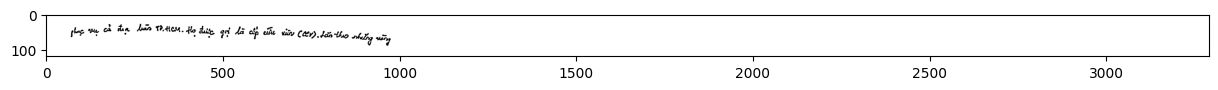

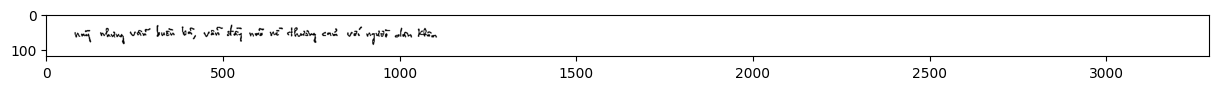

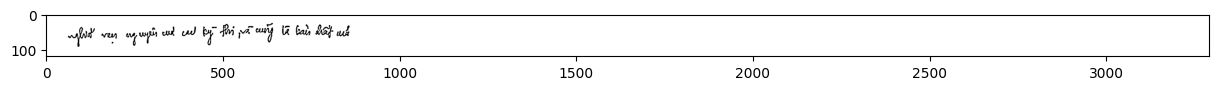

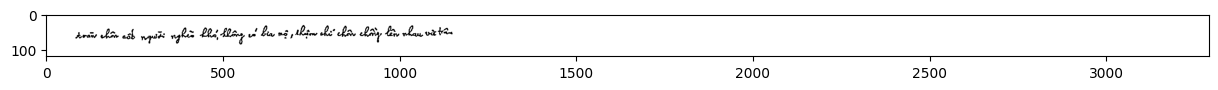

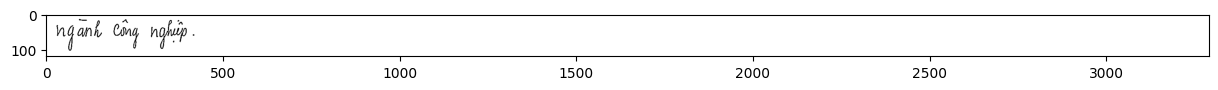

In [18]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(training_img[i][:,:,0], cmap='binary')
    plt.show()
    # print(training_img[i][:,:,0])

In [19]:
# # Open the text file in write mode
# with open("processed_image.txt", "w") as f:
#   # Loop through each row in the image matrix
#   for row in training_img[i][:,:,0]:
#     # Convert the row (list of integers) to a space-separated string
#     row_str = " ".join([str(pixel) for pixel in row])
#     # Write the string representation of the row to the file
#     f.write(row_str + "\n")

In [20]:
#lists for validation dataset
#lists for validation dataset
valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []

for val_img_path in tqdm(val_image_paths, desc="Processing Validation Images"):
    # print(f_name)
    # read input image and convert into gray scale image
    img = cv2.cvtColor(cv2.imread(val_img_path), cv2.COLOR_BGR2GRAY)
    
    # in this dataset, we don't need to do any resize at all here.
    img = cv2.resize(img,(int(118/height*width),118))
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]
        
    img = np.pad(img, ((0,0),(0, 3290-width)), 'constant',constant_values=(255, 255))
    
    # Blur it
    img = cv2.GaussianBlur(img, (5,5), 0)

    # Threshold the image using adapative threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,  
                                # Use THRESH_BINARY
                                 blockSize=11, C=4)
    
    # Invert the image to get black characters on white background
    if _BOOL_INVERT_IMG:
        img = 255 - img  # Invert pixel values
    
    # add channel dimension
    img = np.expand_dims(img , axis = 2)
    
    # Normalize each image
    img = img/255.

    label = dict_filepath_label[val_img_path]

    valid_orig_txt.append(label)   
    valid_label_length.append(len(label))

    # our time steps for valid input
    valid_input_length.append(TIME_STEPS)
    valid_img.append(img)

    # convert words to digits based on charlist
    valid_txt.append(encode_to_labels(label))
print(resize_max_width)

Processing Validation Images: 100%|██████████| 7289/7289 [01:01<00:00, 118.39it/s]

1234


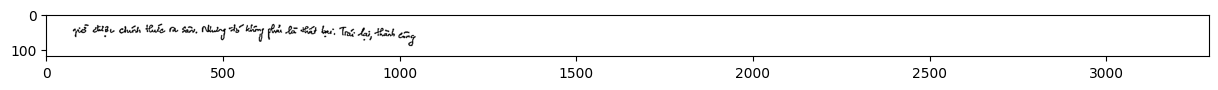

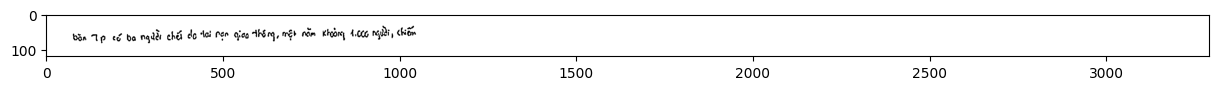

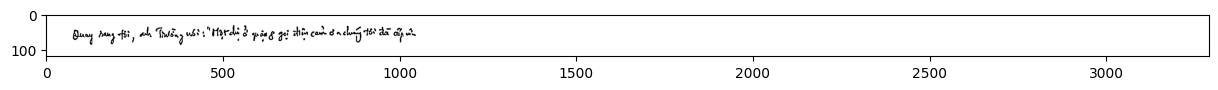

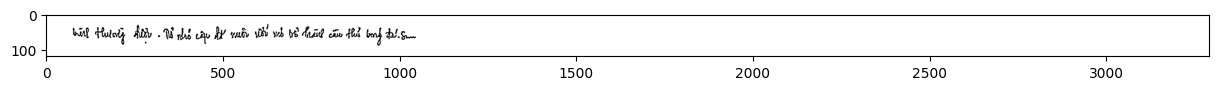

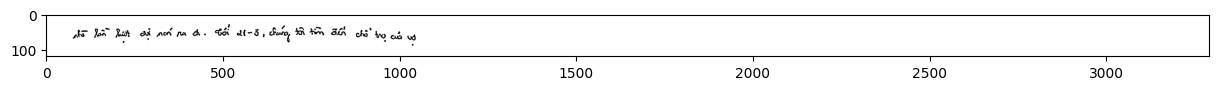

In [21]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(valid_img[i][:,:,0], cmap="binary")
    plt.show()

In [22]:
# this is the most controversial part when our max_label_len should be set different or slightly smaller than TIME_STEPS
# but let stick to the conventional/normal way: we should to be the same with our TIME_STEPS
max_label_len = TIME_STEPS 

In [23]:
# import padding library
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad each output label to maximum text length, remember we did that so that we keep training with rnn consistent?
train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = 0).astype('int32')
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = 0).astype('int32')

2024-03-25 02:34:14.059221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 02:34:15.144331: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /space/hotel/vinhle/miniconda3/envs/Hao/lib/python3.9/site-packages/cv2/../../lib64:
2024-03-25 02:34:15.144450: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /space/hotel/vinhle/miniconda3/envs/H

In [24]:
len(train_padded_txt[0])

181

In [25]:
# import our model, different layers and activation function 
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Reshape, Layer
from keras import initializers, regularizers, constraints

In [26]:
from keras.layers import Conv2D, MaxPool2D, Activation, BatchNormalization, Add, Input, Dense, Reshape, Multiply, GlobalAveragePooling2D, GlobalMaxPooling2D, AveragePooling2D, Concatenate

In [27]:
def channel_attention(input_tensor, reduction_ratio=16):
    channels = K.int_shape(input_tensor)[-1] 
    avg_pool = GlobalAveragePooling2D()(input_tensor)
    max_pool = GlobalMaxPooling2D()(input_tensor)
    fc1 = Dense(channels // reduction_ratio, activation='relu')(avg_pool)
    fc2 = Dense(channels, activation='relu')(fc1)
    channel_attention_weights = Activation('sigmoid')(fc2)
    channel_attention_weights = Reshape((1, 1, channels))(channel_attention_weights)
    return Multiply()([input_tensor, channel_attention_weights])

def spatial_attention(input_tensor):
    max_pool = MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same')(input_tensor)
    avg_pool = AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(input_tensor)
    concatenated = Concatenate(axis=-1)([max_pool, avg_pool])
    spatial_attention_map = Conv2D(1, (7, 7), padding='same', activation='sigmoid')(concatenated)
    return Multiply()([input_tensor, spatial_attention_map])

def cbam_block(input_tensor):
    channel_attended = channel_attention(input_tensor)
    spatial_attended = spatial_attention(channel_attended)
    return spatial_attended


In [28]:
inputs = Input(shape=(118, 3290, 1), name='input')

# Block 1
x = Conv2D(64, (3,3), padding='same', name='conv1')(inputs)
x = MaxPool2D(pool_size=3, strides=3, name='pool1')(x)
x = Activation('relu', name='relu1')(x)
x_1 = x 

# Block 2
x = Conv2D(128, (3,3), padding='same', name='conv2')(x)
x = MaxPool2D(pool_size=3, strides=3, name='pool2')(x)
x = Activation('relu', name='relu2')(x)
x_2 = x

# Block 3
x = Conv2D(256, (3,3), padding='same', name='conv3')(x)
x = BatchNormalization(name='batch_norm3')(x)
x = Activation('relu', name='relu3')(x)
x_3 = x

# Block4
x = Conv2D(256, (3,3), padding='same', name='conv4')(x)
x = BatchNormalization(name='batch_norm4')(x)
x = Add(name='add4')([x,x_3])
x = Activation('relu', name='relu4')(x)
x_4 = x

# Block5
x = Conv2D(512, (3,3), padding='same', name='conv5')(x)
x = BatchNormalization(name='batch_norm5')(x)
x = Activation('relu', name='relu5')(x)
x_5 = x

# Block6
x = Conv2D(512, (3,3), padding='same', name='conv6')(x)
x = BatchNormalization(name='batch_norm6')(x)
x = Add(name='add6')([x,x_5])
x = Activation('relu', name='relu6')(x)
x_6 = x

# Block7
x = Conv2D(1024, (3,3), padding='same', name='conv7')(x)
x = BatchNormalization(name='batch_norm7')(x)
x = Activation('relu', name='relu7')(x)
x_7 = x

# Block8
x = Conv2D(1024, (3,3), padding='same', name='conv8')(x)
x = BatchNormalization(name='batch_norm8')(x)
x = MaxPool2D(pool_size=(3, 2), name='pool3')(x)
x = Activation('relu', name='relu8')(x)

x = MaxPool2D(pool_size=(3, 1))(x)
 
x_cbam = cbam_block(x)

# print(x_cbam.shape)
squeezed = Lambda(lambda x: K.squeeze(x, 1))(x_cbam)
 
blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(blstm_1)

outputs = Dense(len(vietnamese_char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)

act_model.summary()

2024-03-25 02:34:16.167192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 02:34:17.551397: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-03-25 02:34:17.551458: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46699 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:86:00.0, compute capability: 8.6
2024-03-25 02:34:17.552156: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 118, 3290,   0           []                               
                                1)]                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 118, 3290, 6  640         ['input[0][0]']                  
                                4)                                                                
                                                                                                  
 pool1 (MaxPooling2D)           (None, 39, 1096, 64  0           ['conv1[0][0]']                  
                                )                                                             

In [29]:
### ctc definition part 
"""
The reason why we use ctc_batch_cost instead of ctc_cost because
In batch cost, the program managed to mask out padded sequence using label_length, 
So the cost won't include the padding 0 section.
"""

"""
The way CTC is modelled currently in Keras is that you need to implement the loss function as a layer, you did that already (loss_out). 
Your problem is that the inputs you give that layer are not tensors from Theano/TensorFlow but numpy arrays.
To change that one option is to model these values as inputs to your model.
That is why we need to manually create Input for labels, input length and label_length.
"""

# define the label input shape for ctc
labels = Input(name='the_labels', shape=[max_label_len], dtype='float32') #shape = 208

"""
where input_length and label_length are constants you created previously
the easiest way here is to have a fixed batch size in training 
the lengths should have the same batch size (see shapes in the link for ctc_cost)   
"""

# define the length of input and label for ctc
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 
# define a ctc lambda function to take arguments and return ctc_bach_cost
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
# out loss function (just take the inputs and put it in our ctc_batch_cost)
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [ ]:
# ready ctc loss function and optimizers
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam', metrics='cosinesimilarity')

# our callbacks hell to optimize our learning
callbacks = [
    TensorBoard(
        log_dir='./logs',
        histogram_freq=10,
        profile_batch=0,
        write_graph=True,
        write_images=False,
        update_freq="epoch"),
    ModelCheckpoint(
        filepath="keras.weights.h5",
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True,
        verbose=1),
    EarlyStopping(
        monitor='val_loss',
        min_delta=1e-8,
        patience=20,
        restore_best_weights=True,
        verbose=1),
    ReduceLROnPlateau(
        monitor='val_loss',
        min_delta=1e-8,
        factor=0.2,
        patience=10,
        verbose=1)
]
callbacks_list = callbacks

In [ ]:
model.summary()

In [30]:
# notice I convert everything to numpy array here since model can fit either tensors and numpy array
# the reason why i stick with numpy array because it is simple to code and also because it is baseline solution
# I want to use openCV (can't run with tensors because it is CPU operations)
# And if I want to use tensors then i will make sure my image preprocessing functions uses tensor compatible operations

# ready our training data
training_img = np.array(training_img)
train_input_length = np.array(train_input_length)  # all must be equal length to T timesteps
train_label_length = np.array(train_label_length)  # different length (only the same in Captcha dataset)

# ready our validating data
valid_img = np.array(valid_img)
valid_input_length = np.array(valid_input_length) # all must be equal length to T timesteps
valid_label_length = np.array(valid_label_length) # different length (only the same in Captcha dataset)

In [ ]:
# choose batchsize and epochs

batch_size = 16
epochs = 2

history = model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], 
          y=np.zeros(len(training_img)),
          batch_size=batch_size, 
          epochs = epochs,
          validation_data = ([valid_img, valid_padded_txt, valid_input_length, valid_label_length], [np.zeros(len(valid_img))]),
          verbose = 1, 
          callbacks = callbacks_list,
          shuffle=True)

## Evaluation

In [38]:
# load the saved best model weights
# act_model.load_weights(os.path.join('model_ver14_finetune_v2_on_kalapa.h5'))
act_model.load_weights(os.path.join('model_ver14_finetune_v16_dataline.h5'))

In [39]:
prediction = act_model.predict(valid_img)

228/228 [==============================] - 43s 188ms/step


In [40]:
# NO_PREDICTS image results
# 9 timesteps
# 32 chars + 1 blank
prediction.shape

(7289, 182, 230)

In [ ]:
# # Define the file path
# file_path = "model_ver2.txt"

# # Open the file in write mode
# with open(file_path, "w") as file:
#     # Iterate through the predictions
#     for i, x in enumerate(out):
#         # Write original text to the file
#         file.write("original_text  = " + valid_orig_txt[i + OFFSET] + "\n")
        
#         # Write predicted text to the file
#         pred = ""
#         for p in x:
#             if int(p) != -1:
#                 pred += combined_tokens[int(p)]
#         file.write("predicted text = " + pred + "\n\n")

In [41]:
# predict outputs on validation images
NO_PREDICTS = 7289
OFFSET=0

# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
# see the results
all_predictions =[]
i = 0
for x in out:
    print("original_text  = ", valid_orig_txt[i+OFFSET])
    print("predicted text = ", end = '')
    pred = ""
    for p in x:  
        if int(p) != -1:
            pred += vietnamese_char_list[int(p)]
    print(pred)
    all_predictions.append(pred)
    i+=1

original_text  =  giờ được chính thức ra sân. Nhưng đó không phải là thất bại. Trái lại, thành công
predicted text = giả được chính thước só. Nhâng phư khôn không thế thạ thạ tạ t tếi thận tông
original_text  =  bàn TP có ba người chết do tai nạn giao thông, một năm khoảng 1.000 người, chiếm
predicted text = Bòn đa4 só sóo người tệt thệ thự thịi tện tện san sa c0i, gời, gời hễn
original_text  =  Quay sang tôi, anh Trường nói : " Một chị ở quận 8 gọi điện cảm ơn chúng tôi đã cấp cứu
predicted text = Đuang tông tói, ca Thường tư "i " Tới gả gả gả đến đông đ ôn đôn đôn đông can
original_text  =  bình thường được. Từ nhỏ cậu đã nuôi ước mơ trở thành cầu thủ bóng đá. Sau
predicted text = bình thường được. Từ nhỏ tực cộ mớ mớ mộ tộ tá thán thàn tông tôi tan
original_text  =  nhà lần lượt đội nón ra đi. Tối 21 - 3, chúng tôi tìm đến chỗ trọ của vợ
predicted text = chì bàn biát đời mấn cái ca. có. Te te tan đang đan đáá cà cại vố
original_text  =  mới chuyển được một xác. 40 km từ bãi Phước Th

In [ ]:
# #YOUR PART: WRITE TO PRINT OUT THE IMAGES IN NICE 2D ARRAY PLOT WITH ORIGINAL TEXT AND PREDICTED TEXT 
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# plt.figure(figsize=(10,200))
# col=0
# row=1
# gs1 = gridspec.GridSpec(NO_PREDICTS, 1)
# # gs1.update(wspace=0.025, hspace=0.025)
# counter = 0
# for n in range(NO_PREDICTS):
#     plt.subplot(gs1[n])
#     plt.imshow(valid_img[n][:,:,0], cmap="gray")
#     plt.title(f"Label {n}: "+valid_orig_txt[n+OFFSET], fontsize=20, color="green")
#     plt.xlabel(f"Prediction {n}: "+all_predictions[n+OFFSET], fontsize=20, color="red")
#     if counter == 10:
#         break
#     else:  
#         counter += 1


In [42]:
import string
import unicodedata
import editdistance


def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""

    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))

        pd_cer, gt_cer = list(pd.lower()), list(gt.lower())
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd.lower().split(), gt.lower().split()
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))

        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))

    cer_f = sum(cer) / len(cer)
    wer_f = sum(wer) / len(wer)
    ser_f = sum(ser) / len(ser)

    return (cer_f, wer_f, ser_f)

In [43]:
#model ver2 finetuned on kalapa dataset
evaluate = ocr_metrics(
                predicts= all_predictions,
                ground_truth=valid_orig_txt,
                norm_accentuation=False,
                norm_punctuation=False
            )

e_corpus = "\n".join([
    "Metrics:",
    "Character Error Rate: {}".format(evaluate[0]),
    "Word Error Rate:      {}".format(evaluate[1]),
    "Sequence Error Rate:  {}".format(evaluate[2]),
])
print(e_corpus)

Metrics:
Character Error Rate: 0.47712855372895185
Word Error Rate:      0.8612704539241596
Sequence Error Rate:  0.9991768418164357


### Old attention module

In [ ]:
class Attention(Layer):
    def __init__(self, return_sequences = False):
        self.return_sequences = return_sequences
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.Weights = self.add_weight(name='attn_weight', 
                                        shape = (input_shape[-1], 1),
                                        initializer = "normal"
                                        )
        self.bias = self.add_weight(name='attn_bias', 
                                        shape = (input_shape[1], 1),
                                        initializer = "zeros"
                                        )
        super(Attention, self).build(input_shape)
    
    def call(self, x):
        exp = K.tanh(K.dot(x, self.Weights) + self.bias)
        axon = K.softmax(exp, axis=1)
        output = x * axon

        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

### New Attention module

In [ ]:
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True,
                 return_sequences = False,
                 **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='attn_weights',
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='attn_bias',
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        axon = K.exp(eij)

        if mask is not None:
            axon *= K.cast(mask, K.floatx())

        axon /= K.cast(K.sum(axon, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        axon = K.expand_dims(axon)
        weighted_input = x * axon
        
        if self.return_sequences:
            return weighted_input

        return K.sum(weighted_input, axis=1)
